In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

In [3]:
def display_image(image):
  fig = plt.figure(figsize=(15, 15))
  plt.axis('off')
  plt.imshow(image)

def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [4]:
def draw(image, max_boxes, min_score, boxes, class_names, scores):
   
  colors = list(ImageColor.colormap.values())
  #font = ImageFont.load_default()

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",20)
  except IOError:
    font = ImageFont.load_default()

  detected_boxes = boxes.shape[0] 

  for i in range(min(max_boxes, detected_boxes)):
    if scores[i] >= min_score:

      ymin, xmin, ymax, xmax = tuple(boxes[i]) 
      
      
      display_str = "{}: {}%".format(class_names[i].decode("ascii"), 
                                     int(100 * scores[i]))
      
      
      color = colors[hash(class_names[i]) % len(colors)]

      
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")

      draw_bbox_text_on_image(
          image_pil,
          ymin, xmin,
          ymax, xmax,
          color, font,
          display_str_list=[display_str]
      )
      np.copyto(image, np.array(image_pil))

  return image   

def draw_bbox_text_on_image(image,
                            ymin, xmin,
                            ymax, xmax,
                            color, font, thickness=4,
                            display_str_list=()):
   
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size

    
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    
     
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
              (left, top)],
              width=thickness,
              fill=color)

    
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list] # 11

    
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights) # 12
    

    
    if top > total_display_str_height:
      text_bottom = top
    else:
      text_bottom = top + total_display_str_height
      
    for display_str in display_str_list:
      text_width, text_height = font.getsize(display_str)
      margin = np.ceil(0.05 * text_height)
      
       
      draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                      (left + text_width, text_bottom)],
                    fill=color)
      
      
      draw.text((left + margin, text_bottom - text_height - margin),
                display_str,
                fill="black",
                font=font)

In [5]:
def run_detector(detector, path, max_boxes, max_score):
  

  img = load_img(path)

  
  converted_img= tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  print('Detecting Image ...')
  output = detector(converted_img) 
  print('Detection Complete\n')

  for key, value in output.items():
    print(f'Key:{key}\nValue:{value}\n\n')
  
  output = {key:value.numpy() for key,value in output.items()}
  print("Found %d objects." % len(output["detection_scores"]))

  image_with_boxes = draw(img.numpy(),
                          max_boxes, max_score,
                          output['detection_boxes'],
                          output['detection_class_entities'], 
                          output['detection_scores'])
  display_image(image_with_boxes)

In [6]:
faster_rcnn_url = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"

# Load model from tensorflow hub
print('loading model...')
detector = hub.load(faster_rcnn_url).signatures['default']
print('model loaded!') 

loading model...
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


model loaded!


Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.8640374  0.8283411  0.64756525 0.5967899  0.5736936  0.55487025
 0.4714507  0.4091937  0.38690707 0.32695428 0.31600696 0.26717934
 0.26670608 0.2503612  0.21323113 0.1922498  0.19207989 0.18912004
 0.18354745 0.17364681 0.14795226 0.14292072 0.13715003 0.12949209
 0.12737244 0.11187529 0.10898842 0.10656527 0.08553033 0.07871658
 0.06994232 0.06805337 0.05870714 0.05741952 0.05572532 0.05568475
 0.05357413 0.05326041 0.05009186 0.04542026 0.04118155 0.04084346
 0.03966669 0.03938377 0.03333212 0.03302883 0.03106524 0.03041261
 0.03041083 0.02958243 0.02928341 0.0290364  0.02851139 0.02842603
 0.02746152 0.02739673 0.02688879 0.02445109 0.02412176 0.02393487
 0.02389086 0.02190143 0.02189933 0.02161882 0.02121139 0.0211589
 0.02033746 0.01831226 0.01831172 0.01810629 0.0169304  0.01688592
 0.01654526 0.01609985 0.01597054 0.01588337 0.0156904  0.01562287
 0.01539255 0.01532952 0.01471339 0.01471336 0.01445406 0.01427

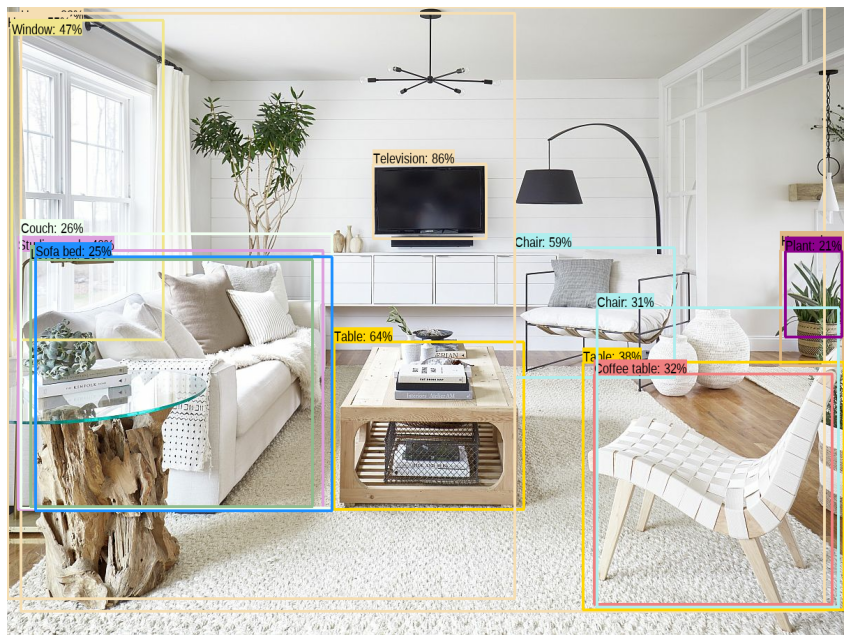

In [7]:
run_detector(detector, '/content/drive/MyDrive/inte-image/Beautiful-small-white-living-room-blends-monochromatic-beauty-with-modernity-53868.jpg', max_boxes=100, max_score=0.2) 

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.9080173  0.758546   0.7237273  0.6795169  0.5045998  0.4598728
 0.4496756  0.33624277 0.33582434 0.33253258 0.2877467  0.22419441
 0.21820131 0.21415639 0.21138409 0.20995964 0.20054008 0.17724784
 0.14812768 0.146569   0.14356443 0.13036655 0.12326739 0.11705071
 0.10661899 0.0949986  0.09364025 0.08961475 0.08948172 0.08596315
 0.07902319 0.07766405 0.073534   0.06886278 0.06866372 0.05862144
 0.0490204  0.04660254 0.0422503  0.04015841 0.03888049 0.03758434
 0.03624635 0.03558923 0.03458621 0.03377292 0.03368979 0.03319108
 0.0258082  0.0227952  0.02249452 0.02178617 0.02167398 0.0202626
 0.01951739 0.0194731  0.0187182  0.01829369 0.01743455 0.01538954
 0.01503887 0.01496302 0.014869   0.01443181 0.01431154 0.0137455
 0.0131567  0.01176827 0.01121286 0.01111366 0.01107945 0.01078155
 0.01036303 0.01023944 0.00985752 0.00850232 0.00842365 0.00813435
 0.00812483 0.00752832 0.00747941 0.00741107 0.00728726 0.0067235

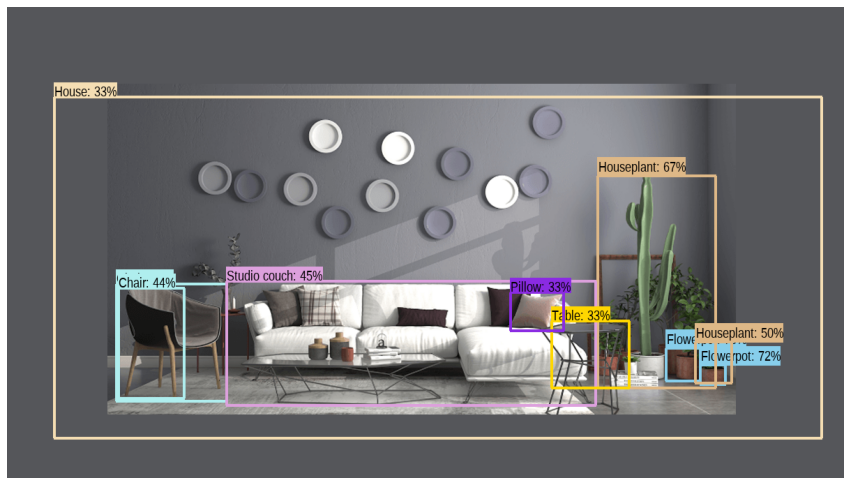

In [8]:
run_detector(detector, '/content/drive/MyDrive/inte-image/New-Project-1.png', max_boxes=100, max_score=0.3) 

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.9150695  0.8139595  0.6818831  0.545191   0.47289208 0.42923012
 0.42621818 0.39997834 0.39657027 0.3218943  0.27131262 0.2674973
 0.26594737 0.26294225 0.25308615 0.24300802 0.23799825 0.21928073
 0.19878888 0.17908385 0.16828597 0.14345911 0.14151165 0.1396256
 0.13334715 0.1267507  0.12522377 0.11625013 0.11506964 0.11246081
 0.10381911 0.10344041 0.10214391 0.10059898 0.09818189 0.09636013
 0.08781024 0.08135414 0.0811102  0.07993766 0.07640697 0.07422619
 0.07349449 0.07223742 0.06836469 0.06588571 0.0655027  0.06013918
 0.05941549 0.05852492 0.05623005 0.05207483 0.05150974 0.05097032
 0.050766   0.04825957 0.04798114 0.04669916 0.04534836 0.04453646
 0.0439898  0.04388813 0.04347645 0.04179345 0.04084104 0.04050886
 0.03891565 0.03811935 0.03803633 0.03621858 0.03573372 0.03340492
 0.03275944 0.02933137 0.02575656 0.02433466 0.02225941 0.02213182
 0.02180725 0.02127589 0.02126211 0.02118363 0.01968772 0.019608

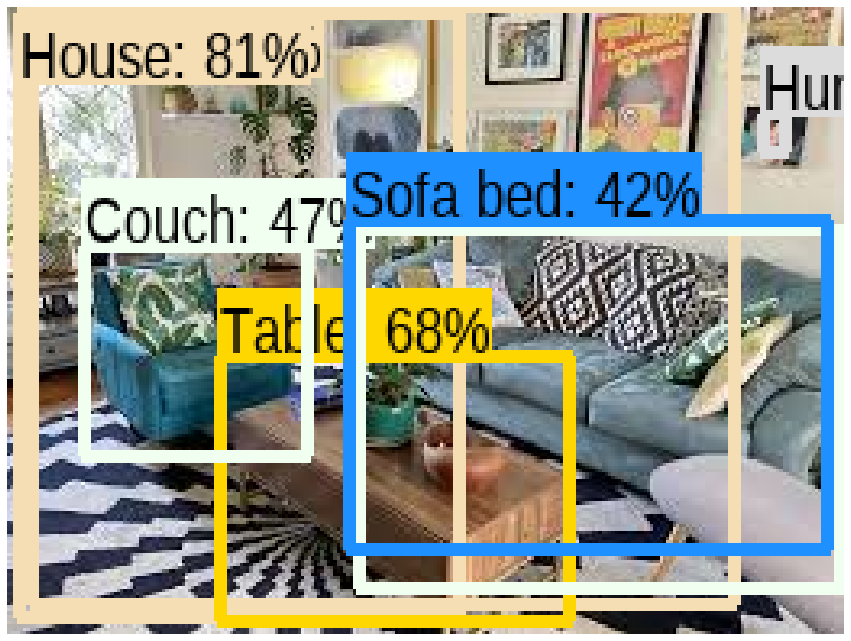

In [9]:
run_detector(detector, '/content/drive/MyDrive/inte-image/download.jpg',  max_boxes=100, max_score=0.4)  

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.80236876 0.6827823  0.67902833 0.66226655 0.5663135  0.5506931
 0.418226   0.38764393 0.37380588 0.31088892 0.30506036 0.3001381
 0.2789491  0.27258098 0.27006868 0.26473275 0.26417547 0.24534103
 0.22694111 0.22637725 0.20871523 0.18836352 0.1729936  0.17139517
 0.1595553  0.14204207 0.13902055 0.13341345 0.12226596 0.11993521
 0.10727951 0.10221843 0.09921259 0.09418999 0.08949908 0.08590461
 0.08073885 0.07963462 0.07462268 0.07355799 0.07200482 0.07191163
 0.07116843 0.06629416 0.06176146 0.05817762 0.05413848 0.05401178
 0.05396731 0.0527308  0.05117974 0.0495315  0.04717722 0.04465203
 0.044294   0.04401404 0.04189222 0.04118752 0.04041398 0.0404119
 0.04031718 0.03768777 0.03728053 0.03707247 0.03656847 0.03633875
 0.03567422 0.03545819 0.03518548 0.03352049 0.03251355 0.03102028
 0.03066414 0.03002988 0.0296474  0.02925251 0.02725138 0.02623807
 0.02594032 0.0257466  0.02569782 0.02548713 0.024778   0.0244508

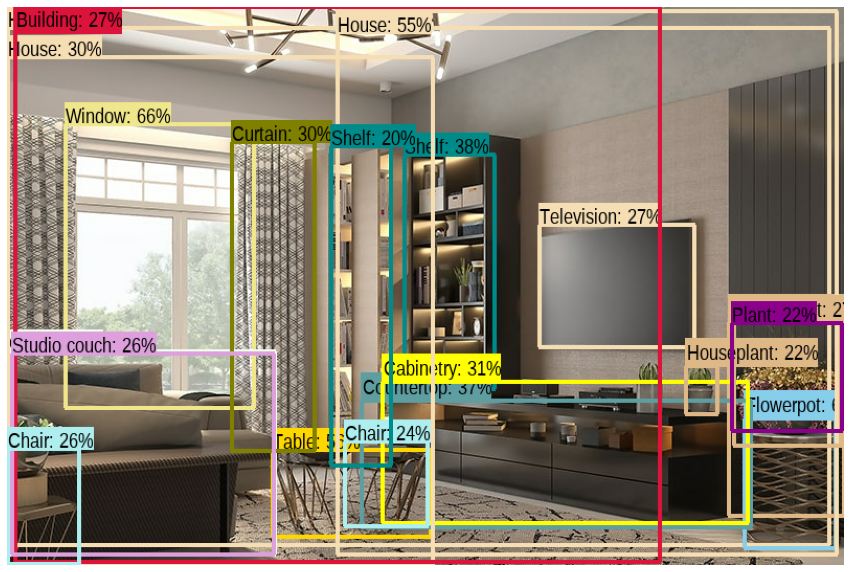

In [10]:
run_detector(detector, '/content/drive/MyDrive/inte-image/interior-design-trends-hyderabad-2020.jpg',  max_boxes=100, max_score=0.2)  

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.6944474  0.552575   0.54847795 0.5030902  0.41277677 0.40805966
 0.37758917 0.34235337 0.28374848 0.27492502 0.2705184  0.25857607
 0.25263453 0.2345571  0.18687123 0.16891114 0.15337312 0.1246603
 0.10850539 0.09470113 0.08815061 0.08006321 0.06531179 0.06231981
 0.0599565  0.05573131 0.05467162 0.05439172 0.05329936 0.04913388
 0.04221113 0.03942635 0.03761313 0.03682054 0.03500789 0.034166
 0.02964963 0.02840665 0.02762247 0.02655702 0.0259098  0.02525918
 0.02512981 0.0237146  0.02368035 0.02319394 0.02306765 0.02287506
 0.02240214 0.02162173 0.02133552 0.02111844 0.02108013 0.02105901
 0.01977156 0.01976096 0.01924603 0.01871224 0.01798753 0.01669576
 0.01518194 0.01493216 0.01455273 0.01398197 0.01304482 0.01298238
 0.01285853 0.01236001 0.01210482 0.01188265 0.01089124 0.01073465
 0.01064974 0.01032598 0.01031417 0.00999583 0.00979247 0.0096479
 0.00939941 0.00902329 0.00873062 0.00864516 0.00857062 0.0084612


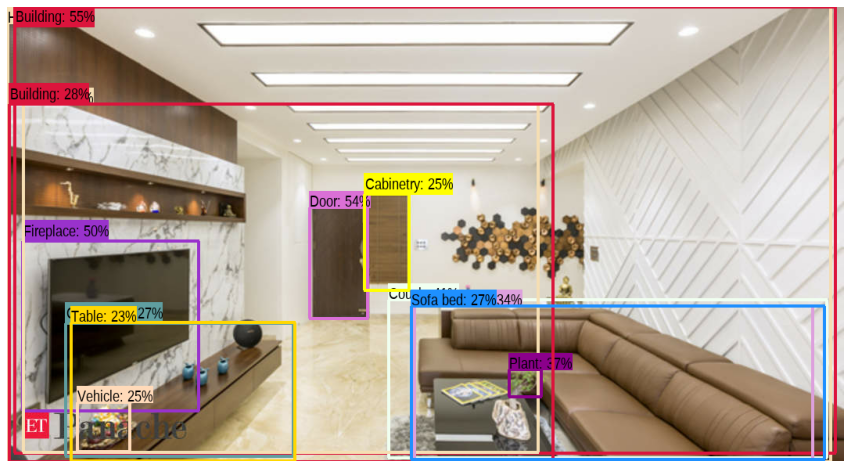

In [11]:
run_detector(detector, '/content/drive/MyDrive/inte-image/photo.jpg',  max_boxes=100, max_score=0.2)  

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.9452421  0.859331   0.6644606  0.54577005 0.46511543 0.44845945
 0.35557738 0.34631005 0.31377277 0.27907342 0.2532582  0.16190617
 0.14248957 0.14129563 0.13986607 0.13915293 0.11164441 0.11076569
 0.10558603 0.10429538 0.10201758 0.10024107 0.09932324 0.08985858
 0.08729332 0.08291998 0.07537699 0.0675377  0.05900949 0.05618814
 0.05347412 0.05343514 0.04607031 0.04316365 0.04169878 0.04109621
 0.03821653 0.03644898 0.03639425 0.03283595 0.03142561 0.03132477
 0.03053916 0.02963254 0.02827068 0.02758136 0.02727038 0.02685375
 0.02658223 0.02561488 0.02300227 0.02254493 0.01963987 0.01893499
 0.01890098 0.01848933 0.01830417 0.0165026  0.01631214 0.0162253
 0.0156536  0.01550678 0.01512348 0.0138193  0.01347878 0.01344595
 0.01326413 0.01313685 0.01290053 0.01275357 0.01239348 0.01220734
 0.01175417 0.01167545 0.01166617 0.01166359 0.0116002  0.01151369
 0.01139787 0.01101196 0.01084394 0.01053615 0.01035491 0.01020

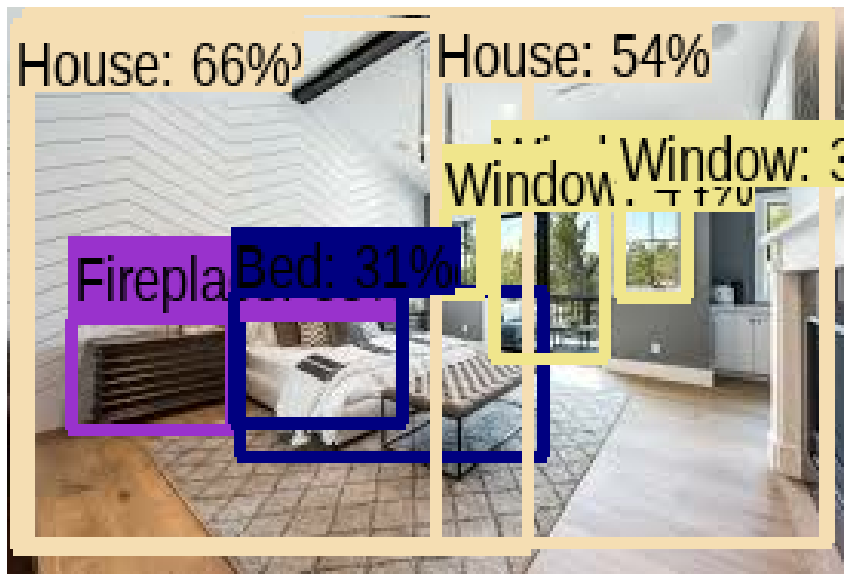

In [14]:
run_detector(detector, '/content/drive/MyDrive/inte-image/images.jpg',  max_boxes=100, max_score=0.3)  

Detecting Image ...
Detection Complete

Key:detection_scores
Value:[0.7730339  0.438242   0.29615337 0.28160924 0.2638764  0.26174703
 0.16602603 0.15440771 0.14992228 0.14575513 0.12421931 0.11122008
 0.09429122 0.09418234 0.09308428 0.08519301 0.07498817 0.06960341
 0.06553105 0.06474962 0.05588172 0.05301404 0.05168778 0.05047226
 0.04503217 0.04316761 0.04264555 0.04053826 0.03625221 0.03520548
 0.03207468 0.02970011 0.02775262 0.02458278 0.02335903 0.02273952
 0.02266578 0.02099141 0.02086684 0.02073357 0.01998484 0.01972833
 0.01854758 0.01811665 0.01811396 0.01660449 0.01636311 0.01615568
 0.01513304 0.01510799 0.01454154 0.01412005 0.01376323 0.01334755
 0.01324082 0.01295338 0.01257356 0.01231873 0.011916   0.01185688
 0.01179435 0.01124807 0.01076491 0.01058847 0.01036857 0.01004201
 0.01001211 0.00998577 0.00981621 0.00959178 0.00951356 0.00920981
 0.00900611 0.00796038 0.00756664 0.00711246 0.00707021 0.00701908
 0.00696799 0.00693919 0.00692793 0.00657381 0.00616674 0.0056

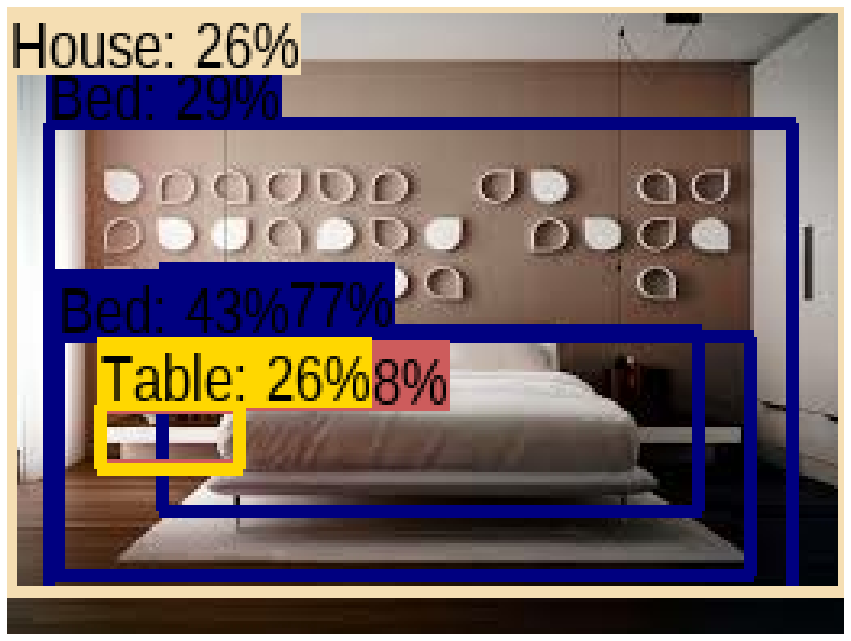

In [13]:
run_detector(detector, '/content/drive/MyDrive/inte-image/images (1).jpg',  max_boxes=100, max_score=0.2)  